Bank Customer Churn Analysis

In [ ]:
import pandas as pd
df = pd.read_csv ('/content/Bank Customer Churn Prediction.csv')
print(df.head())


   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None
        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean 

<ipython-input-5-c93ead24fa8e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['churn'], palette='coolwarm')


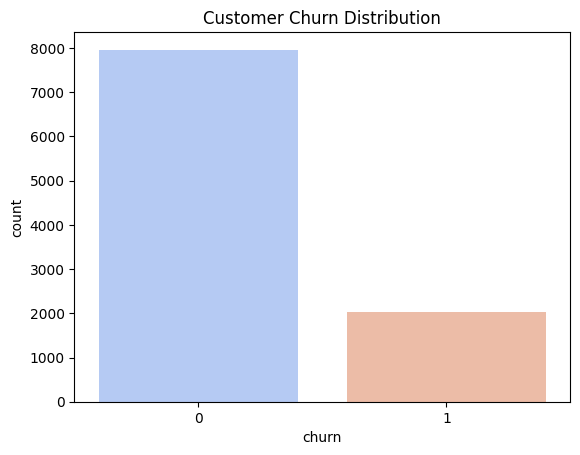

In [ ]:
#Distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=df['churn'], palette='coolwarm')
plt.title("Customer Churn Distribution")
plt.show()


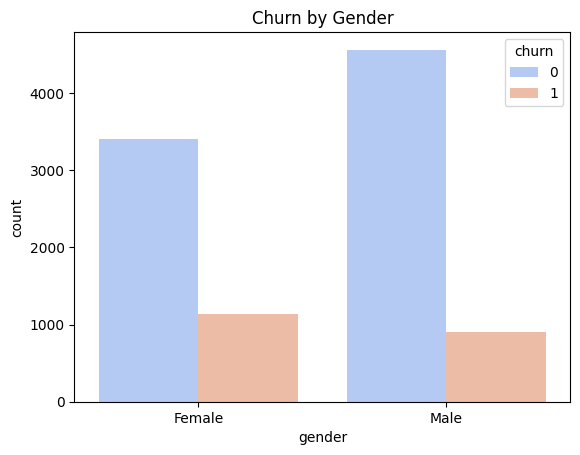

In [ ]:
#Churn by gender
sns.countplot(x="gender", hue="churn", data=df, palette="coolwarm")
plt.title("Churn by Gender")
plt.show()


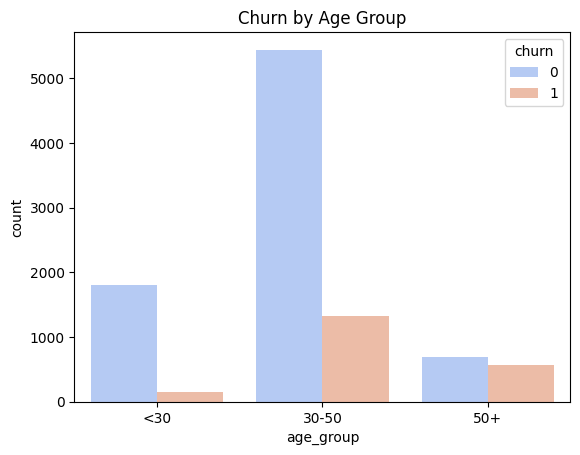

In [ ]:
#Churn by age
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 50, 100], labels=["<30", "30-50", "50+"])
sns.countplot(x="age_group", hue="churn", data=df, palette="coolwarm")
plt.title("Churn by Age Group")
plt.show()


<ipython-input-14-6fc697c0f261>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="country", y="churn", data=country_churn, palette="coolwarm")


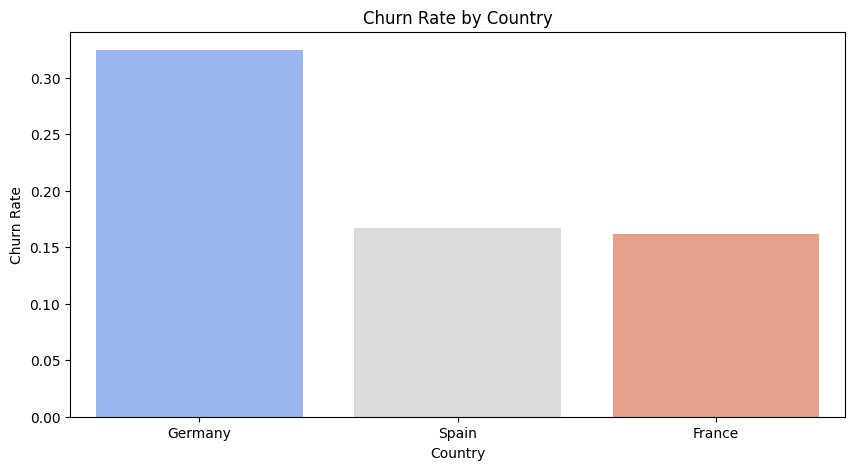

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
country_churn = df.groupby("country")["churn"].mean().reset_index()
country_churn = country_churn.sort_values(by="churn", ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x="country", y="churn", data=country_churn, palette="coolwarm")
plt.title("Churn Rate by Country")
plt.ylabel("Churn Rate")
plt.xlabel("Country")
plt.show()


Applying ML

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [ ]:
# converting text to numbers
le = LabelEncoder()
df["gender"] = le.fit_transform(df["gender"]) #male 1 female 0
df["country"] = le.fit_transform(df["country"])

In [ ]:
# Drop 'age_group' column before defining features (X)
df = df.drop(columns=["age_group"], errors='ignore')

# Define features and target variable
X = df.drop(columns=["customer_id", "churn"])
y = df["churn"]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Using LR first

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize and train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
# Predict on test data
y_pred = model.predict(X_test)
# Check accuracy, classification report and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000

Confusion Matrix:
 [[1559   48]
 [ 321   72]]


Precision (0.60): 60% of predicted churn cases were correct.

Recall (0.18): The model only catches 18% of actual churn cases, which is very low!

Confusion Matrix shows 321 false negatives, meaning many churned customers were missed.

**Trying LR with weighted class**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train Logistic Regression with balanced weights
model_balanced = LogisticRegression(class_weight="balanced", random_state=42)
model_balanced.fit(X_train, y_train)

# Predict on test data
y_pred_balanced = model_balanced.predict(X_test)

print(f"Balanced Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_balanced):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_balanced))


Balanced Logistic Regression Accuracy: 0.71
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.80      1607
           1       0.37      0.68      0.48       393

    accuracy                           0.71      2000
   macro avg       0.63      0.70      0.64      2000
weighted avg       0.80      0.71      0.73      2000



Could improve the model with feature engineering,but more feasable approch is random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Performance
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Fine Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],       # Number of trees
    "max_depth": [10, 20, 30],             # Tree depth
    "min_samples_split": [2, 5, 10],       # Min samples to split
    "min_samples_leaf": [1, 2, 4]          # Min samples per leaf
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train best model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate performance
from sklearn.metrics import classification_report, accuracy_score

print(f"Tuned Random Forest Accuracy: {accuracy_score(y_test, y_pred_best_rf):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Tuned Random Forest Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.45      0.57       393

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



Trying XGB

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize XGBoost model
xgb_model = XGBClassifier(n_estimators=300, max_depth=6, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.52      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.86      0.86      0.86      2000

